<center>
<img src="logo.png" height="900"> 
</center>


#  Описательные статистики

В этой тетрадке мы попробуем искать по данным ответы на свои вопросы. 

In [1]:
import numpy as np         # библиотека для матриц и математики
import pandas as pd        # библиотека для работы с табличками
from scipy import stats    # модуль для работы со статистикой

# библиотеки для визуализации
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')    # стиль графиков

Опция `matplotlib inline` - позволяет рисовать графики прямо в ноутбуке.

In [2]:
%matplotlib inline

# 1. Данные

In [3]:
df = pd.read_csv("data/youtube_data_short.csv", sep = "\t")
df.head()

,title,commentCount,dislikeCount,likeCount,music_style,performer,viewCount,commentators_uniq,comments_obscene_cnt,video_age
0,"""#2Маши ""Свободные линии""",34.0,43.0,1402.0,popsa,2маши,214301.0,24.0,0.0,1141
1,"""ALARM"" СЕРГЕЙ ЛАЗАРЕВ ( SERGEY LAZAREV )",NaN,690.0,10532.0,popsa,лазарев,2221419.0,NaN,NaN,3217
2,"""EARTH SONG"" SERGEY LAZAREV. DEDICATED TO MIC...",26.0,10.0,269.0,popsa,лазарев,40327.0,23.0,0.0,3546
3,"""Earth song"" премия МУЗ-тВ 2010 (LIVE)",12.0,7.0,163.0,popsa,лазарев,11907.0,11.0,0.0,3189
4,"""FAKE"" СЕРГЕЙ ЛАЗАРЕВ (SERGEY)",46.0,19.0,597.0,popsa,лазарев,91483.0,33.0,1.0,3361


__Описание колонок:__

- `title` - название видео
- `commentCount` - число комментариев
- `dislikeCount` - число дизлайков
- `likeCount`  - число лайков
- `music_style` - музыкальный стиль
- `performer` - исполнитель
- `viewCount` - число просмотров
- `commentators_uniq` - число уникальных комментаторов
- `comments_obscene_cnt` - число комментариев
- `video_age` - возраст видео в днях

Возраст видео посчитан в днях относительно `2019-03-15` (момент, когда данные собирались авторами курса).

# 2. На любые ответы всегда найдутся вопросы

В pandas можно пытаться искать ответы на разные интересующие вас вопросы. Давайте попробуем такие ответы находить. 

- Сколько всего наблюдений в таблице? 

In [4]:
df.shape

(19124, 10)

In [5]:
df.size

191240

- Сколько уникальных исполнителей встречается в данных? 

In [6]:
len(df.performer.unique())

111

In [7]:
df.performer.unique().size

111

- Выведите троих исполнителей, у которых в данных больше всего клипов.

In [8]:
x = list(df.performer.value_counts()[:3].index)
x

['николаев', 'валерия', 'михайлов']

In [9]:
len(x)

3

- Какая доля клипов приходится на рэп? 

In [10]:
(df.music_style == 'rap').mean()

0.10604476051035348

- Какая доля приходится на разные жанры? 

In [11]:
df.music_style.value_counts()/df.shape[0]

rock       0.307885
estrada    0.217057
popsa      0.174597
shanson    0.107770
rap        0.106045
indi       0.071063
classic    0.015583
Name: music_style, dtype: float64

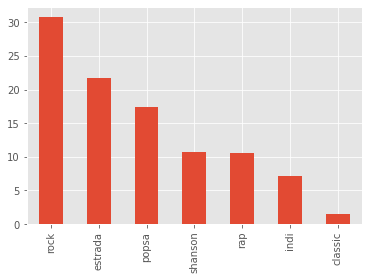

In [12]:
y =(100*df.music_style.value_counts()/df.shape[0])
y.plot(kind='bar')

- Сколько исполнителей пишут свою музыку сразу в нескольких жанрах? 

In [13]:
df_agg = df.groupby('performer')['music_style'].agg('nunique')
(df_agg > 1).sum()

0

- сколко в среднем просмотров под видео с `likeCoun > 100000` и `commentators_uniq > 50`.

In [14]:
df_restricted = df[(df.likeCount > 100000)&(df.commentators_uniq > 50)]

In [15]:
df.shape

(19124, 10)

In [16]:
df_restricted.shape

(214, 10)

In [17]:
df_restricted.viewCount.mean()

39326558.901869155

- Выведите 5% самых популярных исполнителей. В качестве меры популярности используйте разность между медианным числом лайков и дизлайков. Оценку популярности стройте только по исполнителям, собравшим в сумме больше 100 000 лайков. 

In [18]:
df_r = df[df.likeCount > 100000]
df_agg = df_r.groupby('performer')[['likeCount', 'dislikeCount']].median()

In [19]:
df_agg['popularity'] = df_agg['likeCount'] - df_agg['dislikeCount']
df_agg.head()

,likeCount,dislikeCount,popularity
performer,,,
2маши,212909.0,24583.0,188326.0
classical_channel,271070.5,10307.5,260763.0
face,405493.0,54433.0,351060.0
feduk,381360.0,44912.0,336448.0
gazgolder,192971.0,16075.0,176896.0


In [20]:
q = df_agg.popularity.quantile(0.95)
q

337304.89999999997

In [21]:
df_agg[df_agg.popularity > q]['popularity'].sort_values(ascending=False)

performer
miyagi&эндшпиль    701683.0
face               351060.0
лсп                337350.0
Name: popularity, dtype: float64

In [22]:
df

,title,commentCount,dislikeCount,likeCount,music_style,performer,viewCount,commentators_uniq,comments_obscene_cnt,video_age
0,"""#2Маши ""Свободные линии""",34.0,43.0,1402.0,popsa,2маши,214301.0,24.0,0.0,1141
1,"""ALARM"" СЕРГЕЙ ЛАЗАРЕВ ( SERGEY LAZAREV )",NaN,690.0,10532.0,popsa,лазарев,2221419.0,NaN,NaN,3217
2,"""EARTH SONG"" SERGEY LAZAREV. DEDICATED TO MIC...",26.0,10.0,269.0,popsa,лазарев,40327.0,23.0,0.0,3546
3,"""Earth song"" премия МУЗ-тВ 2010 (LIVE)",12.0,7.0,163.0,popsa,лазарев,11907.0,11.0,0.0,3189
4,"""FAKE"" СЕРГЕЙ ЛАЗАРЕВ (SERGEY)",46.0,19.0,597.0,popsa,лазарев,91483.0,33.0,1.0,3361
...,...,...,...,...,...,...,...,...,...,...
19119,♫♪Мы расстаемся ♫♪ Бутырка new2019,2.0,0.0,11.0,shanson,бутырка,1107.0,NaN,NaN,44
19120,❤ 2 ЧАСА ❤ МОЦАРТ Для Младенцев - Колыбельная ...,94.0,431.0,1837.0,classic,classical_channel,391836.0,37.0,1.0,239
19121,モスクワライブショー ' 17,4872.0,15494.0,30603.0,rap,элджей,1187340.0,1788.0,352.0,339
19122,舞梅鬼 - 新年好宝贝 / Mumiy Troll - Happy New Year ...,59.0,10.0,260.0,rock,мумий_тролль,10147.0,19.0,0.0,997
